<a href="https://colab.research.google.com/github/jeffowino/Art053_NN_DCGAN/blob/main/Big_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#install pyspark if not installed

In [11]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#importing  some required libraries
import pandas as pd
import numpy as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext


In [13]:
#creating spark session
sparkSession = (SparkSession
 .builder
 .appName('example-pyspark-read-and-write-from-hive')
 .enableHiveSupport()
 .getOrCreate())

In [14]:
import urllib.request

# Download the feature descriptions
url_features = "https://www.dropbox.com/s/c8qrzd99z5s9ub6/UNSW-NB15_features.csv?dl=1"
filename_features = "UNSW-NB15_features.csv"
urllib.request.urlretrieve(url_features, filename_features)


('UNSW-NB15_features.csv', <http.client.HTTPMessage at 0x7fde331c1b70>)

In [15]:
import urllib.request

# Download the raw dataset without column headers
url_dataset = "https://www.dropbox.com/s/4xqg32ih9xoh5jq/UNSW-NB15.csv?dl=1"
filename_dataset = "UNSW-NB15.csv"
urllib.request.urlretrieve(url_dataset, filename_dataset)


('UNSW-NB15.csv', <http.client.HTTPMessage at 0x7fde331c09d0>)

In [16]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("UNSW-NB15").getOrCreate()

# Load the feature descriptions into a PySpark DataFrame
features = spark.read.csv("/content/UNSW-NB15_features.csv", header=True, inferSchema=True)

# Extract the column names from the feature descriptions
column_names = [row['Name'] for row in features.select('Name').collect()]

# Load the raw dataset without column headers into a PySpark DataFrame and add the column names
fd = spark.read.csv("/content/UNSW-NB15.csv", header=False, inferSchema=True) \
           .toDF(*column_names)



In [17]:
#So for further work on our project we will save pandas dataframe d1 into a .csv formatted dataframe combined.csv file
#d1.to_csv('combined.csv')

In [18]:
#Columns in fd dataframe
fd.columns

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [19]:
#changing column names of _c0 to id and ct_src_ ltm to ct_src_ltm
fd = fd.withColumnRenamed("ct_src_ ltm", "ct_src_ltm")
dframe = fd.withColumnRenamed("_c0", "id")

In [20]:
#Write our dataframe into hive table

dframe.write.saveAsTable('examples9')

In [21]:
# Read from Hive Table
df_load = sparkSession.sql('SELECT * FROM examples9')
df_load.show()

+--------------+-----+--------------+------+-----+-----+------------+------+-------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+----------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|         srcip|sport|         dstip|dsport|proto|state|         dur|sbytes| dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|      Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|atta

In [22]:
df_load.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

In [23]:
#Dropping unnecessary columns.. means they have no or negligible impact on results
columns_to_drop = ['srcip', 'sport', 'dstip', 'dsport','stcpb','dtcpb','Ltime', 'Stime']
df_load = df_load.drop(*columns_to_drop)

In [24]:
#Showing columns of updated dataframe
df_load.columns

['proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [25]:
#Checking null values of dataframe

from pyspark.sql.functions import isnull, when, count, col

df_load.select([count(when(isnull(c), c)).alias(c) for c in df_load.columns]).show()

+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+

In [26]:
#WE can see above that there is only one variable named attack_cat which have null values

df_load.groupBy("attack_cat").count().show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    174|
|      Shellcode|    223|
|           null|2218456|
|      Backdoors|    534|
|        Fuzzers|   5051|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
| Reconnaissance|   1759|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|        Generic| 215481|
+---------------+-------+



In [27]:
# we are seeing Reconnaissance occuriing 2 time as one is named as Reconnaissance and another Reconnaissance + 1 space.. so we can merge them by renaming another as Reconnaissance
# Fuzzers and shellcode also doing same 
#Update dataset
from pyspark.sql import functions as F
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Reconnaissance ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Fuzzers ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Shellcode ', "Reconnaissance").otherwise(F.col("attack_cat")))

In [28]:
df_load.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    174|
|     Shellcode|    223|
|          null|2218456|
|     Backdoors|    534|
|       Fuzzers|   5051|
|      Analysis|   2677|
|           DoS|  16353|
|Reconnaissance|  34470|
|      Backdoor|   1795|
|      Exploits|  44525|
|       Generic| 215481|
+--------------+-------+



In [29]:
# here null means  normal attacks, so replacing null values with  normal
df_load = df_load.na.fill('normal')

In [30]:
df_load.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    174|
|     Shellcode|    223|
|     Backdoors|    534|
|        normal|2218456|
|       Fuzzers|   5051|
|      Analysis|   2677|
|           DoS|  16353|
|Reconnaissance|  34470|
|      Backdoor|   1795|
|      Exploits|  44525|
|       Generic| 215481|
+--------------+-------+



In [31]:
# As the dataset is very very large. So we are taking 1/10th of our original dataset for our further calculations

import pandas as pd

#columns = df_load.schema.fieldNames()
#chunks = df_load.repartition(10).rdd.mapPartitions(lambda iterator: [pd.DataFrame(list(iterator), columns=columns)]).toLocalIterator()
#for pdf in chunks:
    # do work locally on chunk as pandas df
df_x = fd

In [32]:
# So we have created a Pandas DataFrane and will convert it into spark dataframe

In [33]:
df_x.head()

Row(srcip='59.166.0.3', sport=56716, dstip='149.171.126.8', dsport=143, proto='tcp', state='FIN', dur=0.82546002, sbytes=7812, dbytes=16236, sttl=31, dttl=29, sloss=30, dloss=32, service='-', Sload=75090.25, Dload=156111.73, Spkts=122, Dpkts=126, swin=255, dwin=255, stcpb=2751097753, dtcpb=2748686736, smeansz=64, dmeansz=129, trans_depth=0, res_bdy_len=0, Sjit=445.25928, Djit=474.9451, Stime=1421970774, Ltime=1421970775, Sintpkt=6.8190908, Dintpkt=6.599896, tcprtt=0.00059700001, synack=0.00046899999, ackdat=0.000128, is_sm_ips_ports=0, ct_state_ttl=0, ct_flw_http_mthd=0, is_ftp_login=0, ct_ftp_cmd=0, ct_srv_src=2, ct_srv_dst=7, ct_dst_ltm=1, ct_src_ltm=4, ct_src_dport_ltm=1, ct_dst_sport_ltm=1, ct_dst_src_ltm=1, attack_cat=None, Label=0)

In [34]:
# Creating Spark dataframe sdf from pandas dataframe df_x
sdf = df_x

In [35]:
#Columns in our dataframe
#sdf.columns

In [36]:
#sdf.columns

In [37]:
sdf.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

In [38]:
# Checking count of protocols
sdf.groupBy("proto").count().show()

+----------+-----+
|     proto|count|
+----------+-----+
|      cphb|  137|
|      larp|  137|
|nsfnet-igp|  137|
|       dgp|  137|
|       tcf|  137|
|     crudp|  137|
|      vrrp|  137|
|       igp|  137|
|       nvp|  137|
|   mfe-nsp|  137|
|        il|  137|
|       prm|  137|
|      micp|  137|
|  wb-expak|  137|
|      ospf| 7798|
|br-sat-mon|  137|
|      idrp|  137|
|        ib|  137|
| kryptolan|  137|
|sprite-rpc|  137|
+----------+-----+
only showing top 20 rows



In [39]:
#Total no of rows
sdf.count()

2539739

In [40]:
#We have read our dataset and found some columns on which we can apply Indexing

# Indexing proto, state and service column's values  
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="proto", outputCol="xProto")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="state", outputCol="xState")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="service", outputCol="xSer")
sdf = indexer.fit(sdf).transform(sdf) 
sdf.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src

In [41]:
#Dropping the columns which have indexed and some other columns as they also  have no or negligible impact on our results 
columns_to_drop = ['srcip','sport','dstip','Stime','Ltime','proto','state']
sdf = sdf.drop(*columns_to_drop)

In [42]:
sdf.columns

['dsport',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label',
 'xProto',
 'xState',
 'xSer']

In [43]:
#Checking number of distinct values in each columns

#from pyspark.sql.functions import col, countDistinct

#for column_name in sdf.columns:
    #count_distinct=sdf.agg(countDistinct(col(column_name).alias("distinct_counts"))).head()[0]
    #print('The number of distinct values of '+column_name+ ' is ' +str(count_distinct))

The number of distinct values of dsport is 64626
The number of distinct values of dur is 587302
The number of distinct values of sbytes is 14154
The number of distinct values of dbytes is 19166
The number of distinct values of sttl is 13
The number of distinct values of dttl is 11
The number of distinct values of sloss is 544
The number of distinct values of dloss is 707
The number of distinct values of service is 13
The number of distinct values of Sload is 1100051
The number of distinct values of Dload is 1173697
The number of distinct values of Spkts is 933
The number of distinct values of Dpkts is 1255
The number of distinct values of swin is 36
The number of distinct values of dwin is 32
The number of distinct values of stcpb is 1429571
The number of distinct values of dtcpb is 1429031
The number of distinct values of smeansz is 1415
The number of distinct values of dmeansz is 1417
The number of distinct values of trans_depth is 14
The number of distinct values of res_bdy_len is 2

In [44]:
#Checking time taken to perform some queries given below

In [45]:
from time import time

t0 = time()
sdf.select("xProto", "Djit", "dbytes").groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+------+-------+
|xProto|  count|
+------+-------+
|   8.0|    274|
|  67.0|    137|
|  70.0|    137|
|   0.0|1495074|
|  69.0|    137|
|   7.0|    324|
| 112.0|    137|
| 124.0|    137|
| 128.0|    137|
| 108.0|    137|
| 133.0|      7|
|  88.0|    137|
|  49.0|    137|
| 101.0|    137|
| 116.0|    137|
|  98.0|    137|
| 107.0|    137|
|  29.0|    137|
|  75.0|    137|
|  64.0|    137|
+------+-------+
only showing top 20 rows

Query performed in 8.063 seconds


In [46]:
t0 = time()
sdf.select("xProto", "Djit", "dbytes").filter(sdf.Djit<1000).filter(sdf.dbytes > 1000).groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+------+-------+
|xProto|  count|
+------+-------+
|   0.0|1097818|
|   1.0|    184|
|  15.0|     15|
|   5.0|    163|
|   3.0|      4|
+------+-------+

Query performed in 13.335 seconds


In [47]:
t0 = time()
sdf.select("Label").groupBy("Label").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+-----+-------+
|Label|  count|
+-----+-------+
|    1| 321283|
|    0|2218456|
+-----+-------+

Query performed in 8.565 seconds


In [48]:
t0 = time()
sdf.select("attack_cat").groupBy("attack_cat").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    174|
|           null|2218456|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|        Generic| 215481|
|      Shellcode|    223|
|      Backdoors|    534|
|        Fuzzers|   5051|
| Reconnaissance|   1759|
+---------------+-------+

Query performed in 5.631 seconds


In [49]:
#Trying some operations on some columns of our dataset (Not necessary for our calculations..) 

In [97]:
# Import Necessary data types
from pyspark.sql.functions import udf,split
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, ArrayType

# Create a function for all the data manipulations
def new_cols(sbytes,dbytes):
 if sbytes<4400: sb_Category='Small'
 elif sbytes<8000: sb_Category='Medium'
 else: sb_Category='Large'
 if dbytes<1000: db_Category='Low'
 elif dbytes<4000: db_Category='Mid'
 else: db_Category='High'
 return sb_Category,db_Category

# Apply the user defined function on the dataframe
udfB=udf(new_cols,StructType([StructField("sb_Category", StringType(), True),StructField("db_Category", StringType(), True)]))

dff=sdf.select('sbytes','dbytes').withColumn("newcat",udfB("sbytes","dbytes"))

# Unbundle the struct type columns into individual columns and drop the struct type 
dff1 = dff.select('sbytes','dbytes','newcat').withColumn('db_Category', dff.newcat.getItem('db_Category')).withColumn('sb_Category', dff.newcat.getItem('sb_Category')).drop('newcat')

dff1.show()

+------+------+-----------+-----------+
|sbytes|dbytes|db_Category|sb_Category|
+------+------+-----------+-----------+
|   550|   268|        Low|      Small|
|  1156|   536|        Low|      Small|
| 11724|   468|        Low|      Large|
|   200|     0|        Low|      Small|
| 10880|     0|        Low|      Large|
|   776|  2122|        Mid|      Small|
|   168|     0|        Low|      Small|
|  1040|  3396|        Mid|      Small|
|   114|     0|        Low|      Small|
|   114|     0|        Low|      Small|
|   114|     0|        Low|      Small|
|   114|     0|        Low|      Small|
|   168|     0|        Low|      Small|
|   748|   268|        Low|      Small|
|   406|     0|        Low|      Small|
| 34706|  1010|        Mid|      Large|
| 24635|  1920|        Mid|      Large|
|  3110|466124|       High|      Small|
|   168|     0|        Low|      Small|
|   200|     0|        Low|      Small|
+------+------+-----------+-----------+
only showing top 20 rows



In [98]:
from pyspark.sql.functions import concat
dff1 =dff1.withColumn('sbdb_Category', concat(dff1.db_Category,dff1.sb_Category))
dff1.show()

+------+------+-----------+-----------+-------------+
|sbytes|dbytes|db_Category|sb_Category|sbdb_Category|
+------+------+-----------+-----------+-------------+
|   550|   268|        Low|      Small|     LowSmall|
|  1156|   536|        Low|      Small|     LowSmall|
| 11724|   468|        Low|      Large|     LowLarge|
|   200|     0|        Low|      Small|     LowSmall|
| 10880|     0|        Low|      Large|     LowLarge|
|   776|  2122|        Mid|      Small|     MidSmall|
|   168|     0|        Low|      Small|     LowSmall|
|  1040|  3396|        Mid|      Small|     MidSmall|
|   114|     0|        Low|      Small|     LowSmall|
|   114|     0|        Low|      Small|     LowSmall|
|   114|     0|        Low|      Small|     LowSmall|
|   114|     0|        Low|      Small|     LowSmall|
|   168|     0|        Low|      Small|     LowSmall|
|   748|   268|        Low|      Small|     LowSmall|
|   406|     0|        Low|      Small|     LowSmall|
| 34706|  1010|        Mid| 

In [ ]:
####

In [52]:
#droping duplicate rows if there exist

sdf = sdf.dropDuplicates()

In [53]:
#Showing 10 rows of our dataframe
sdf.show(10)

+------+------------+------+------+----+----+-----+-----+--------+---------+-----------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+----------+----------+----------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+
|dsport|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|      Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|      Djit|   Sintpkt|   Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|
+------+------------+------+------+----+----+-----+-----+--------+---------+-----------+----

In [54]:
#Check total no of rows after dropping duplicates
sdf.count()

2027421

In [ ]:

#Analytical method -1 Descriptive Statistic


In [99]:
# on first few columns
sdf.describe('sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload').show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|           sbytes|            dbytes|               dur|              sttl|              dttl|             sloss|            dloss|             Sload|             Dload|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|            88442|             88442|             88442|             88442|             88442|             88442|            88442|             88442|             88442|
|   mean|19907.55143483865|15498.814443364012| 1.503079145683704|210.31303000836706| 155.1389045928405| 9.089448452092897| 7.13192826937428|7.83026710834483E7|  40129.5307344183|
| stddev|294807.2598380079|213655.63434019542|5.8718223874597975| 80.61123534628534|122.28671380077434|11

In [100]:
#On next few columns
sdf.describe('Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit').show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|            Spkts|             Dpkts|              swin|              dwin|           smeansz|           dmeansz|       trans_depth|      res_bdy_len|             Sjit|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            88442|             88442|             88442|             88442|             88442|             88442|             88442|            88442|            88442|
|   mean|25.06785237782954|19.582890481897742|156.26037403043802| 156.2574907849212|183.49365685986297|123.34494923226521|0.1990004748874969|2980.298692928699|5852.895726132238|
| stddev| 223.647251895632|162.94596659867403|124.21459391691265|124.21526146953322| 273.5706975340044|266.004

In [101]:
sdf.describe('Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst').show()

+-------+------------------+------------------+-----------------+-------------------+--------------------+--------------------+------------------+------------------+
|summary|              Djit|           Sintpkt|          Dintpkt|             tcprtt|              synack|              ackdat|        ct_srv_src|        ct_srv_dst|
+-------+------------------+------------------+-----------------+-------------------+--------------------+--------------------+------------------+------------------+
|  count|             88442|             88442|            88442|              88442|               88442|               88442|             88442|             88442|
|   mean| 642.6674428790922|119.81587625287416|96.07408927182497|0.07952181721506056|0.039244225998007705|0.040277591225922144| 7.049919721399335| 6.657515659980552|
| stddev|3047.5341196055797|1080.7042787138582|602.5984163856488|0.08080726850065861| 0.04431833754942731| 0.04119070741302259|10.440125430200306|10.485643197201497|
|   

In [102]:
#On last few columns
sdf.describe('ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm').show()

+-------+-----------------+-----------------+------------------+------------------+------------------+
|summary|       ct_dst_ltm|       ct_src_ltm|  ct_src_dport_ltm|  ct_dst_sport_ltm|    ct_dst_src_ltm|
+-------+-----------------+-----------------+------------------+------------------+------------------+
|  count|            88442|            88442|             88442|             88442|             88442|
|   mean|4.052441147870921|4.935019560842134|3.6468306913005133|2.7321295312181997|   6.4150516722824|
| stddev|7.005621974485915|7.575069932589644| 6.740615132529433| 4.488959180310762|10.591458472988688|
|    min|                1|                1|                 1|                 1|                 1|
|    max|               67|               67|                67|                38|                67|
+-------+-----------------+-----------------+------------------+------------------+------------------+



In [103]:


#Anltical method 2 stsistical 



In [104]:
#for some features calculating mean , min and max
from pyspark.sql.functions import mean, min, max
colms = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload']
for i in range(len(colms)):
    clm = colms[i]
    sdf.select([mean(clm), min(clm), max(clm)]).show()

+-----------------+-----------+-----------+
|      avg(sbytes)|min(sbytes)|max(sbytes)|
+-----------------+-----------+-----------+
|19907.55143483865|          0|   14355774|
+-----------------+-----------+-----------+

+------------------+-----------+-----------+
|       avg(dbytes)|min(dbytes)|max(dbytes)|
+------------------+-----------+-----------+
|15498.814443364012|          0|   14657531|
+------------------+-----------+-----------+

+------------------+---------+---------+
|         avg(sttl)|min(sttl)|max(sttl)|
+------------------+---------+---------+
|210.31303000836706|        0|      255|
+------------------+---------+---------+

+-----------------+---------+---------+
|        avg(dttl)|min(dttl)|max(dttl)|
+-----------------+---------+---------+
|155.1389045928405|        0|      253|
+-----------------+---------+---------+

+-----------------+----------+----------+
|       avg(sloss)|min(sloss)|max(sloss)|
+-----------------+----------+----------+
|9.089448452092897| 

In [ ]:



#Analytical method 3 : Covariance





In [ ]:
#Sample covarience on some pairs of columns

print("Covariance between sbytes and dbytes", sdf.stat.cov('sbytes', 'dbytes'))
print("Covariance between sloss and dloss", sdf.stat.cov('sloss', 'dloss'))
print("Covariance between Sload and Dload",sdf.stat.cov('Sload', 'Dload'))
print("Covariance between swin and dwin",sdf.stat.cov('swin', 'dwin'))

In [ ]:


#Analytical method 4 : Correlations



[[1.0, 0.006175623880714862, 0.3385242234342694, -0.0558862218239066, 0.05125795401007811, 0.9979420099261822, 0.002151745757054243, -0.021106855747457822, -0.010991231994347109, 0.9920880533270358, 0.20834754293449023, 0.051225551693181354, 0.0512268219514619, 0.25156905890420034, -0.01565035890640546, -0.002917773591662976, -0.0009216929159714089, -0.005549157141103834, -0.01002369114396772, -0.005807386395902831, -0.0017909671680636221, 0.03326280718373145, 0.02878086914295769, 0.034288226702953443, -0.03532528960290542, -0.03449434216311728, -0.023615709431274754, -0.02466686581553951, -0.025592309105131057, -0.02552681985882177, -0.03194983226541812], [0.006175623880714862, 1.0, 0.2317348860121382, -0.12303298160547989, 0.05726268351277899, 0.004016328924009046, 0.9994106733860125, -0.023902994014227623, 0.4090193115692473, 0.11178360628364628, 0.976491176599992, 0.057351112555802275, 0.057352478818723504, -0.03050926165626075, 0.3026601323961526, 0.014644115539217094, 0.427857710

<ipython-input-105-4326b3dadc77>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+attr)
<ipython-input-105-4326b3dadc77>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+attr)


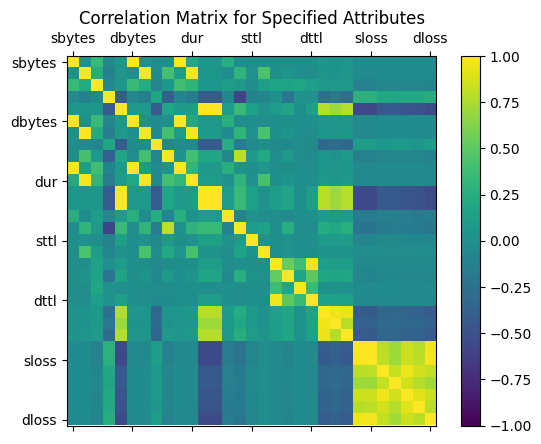

In [105]:
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

columns = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']


vector_col = "corr_features"
assembler = VectorAssembler(inputCols = columns, 
                            outputCol = vector_col)
myGraph_vector = assembler.transform(sdf).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)


matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)


df = sparkSession.createDataFrame(corrmatrix,columns)
df.show()


def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, columns, 234)

In [106]:
#another method to calculate correlation between some pairs
# correlation on some pairs of columns
print("Correlation between sbytes and dbytes", sdf.stat.corr('sbytes', 'dbytes'))
print("Correlation between sloss and dloss", sdf.stat.corr('sloss', 'dloss'))
print("Correlation between Sload and Dload",sdf.stat.corr('Sload', 'Dload'))
print("Correlation between swin and dwin",sdf.stat.corr('swin', 'dwin'))
print("Correlation between swin and dwin",sdf.stat.corr('sttl', 'dttl'))

Correlation between sbytes and dbytes 0.006175623880714772
Correlation between sloss and dloss 0.0004729198633011057
Correlation between Sload and Dload -0.07824427101739859
Correlation between swin and dwin 0.9999761743934774
Correlation between swin and dwin -0.41285520098285666


In [ ]:



#Analytical method 5 : Frequents items





In [107]:
#Frequent Items:  the following code finds the frequent items that show up 40% of the time for each column

sdf.stat.freqItems(['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin',
                    'smeansz','dmeansz','trans_depth','res_bdy_len','Sjit'], 0.4).collect()[0]

Row(sbytes_freqItems=[114], dbytes_freqItems=[268, 0], dur_freqItems=[1.317284, 2e-06], sttl_freqItems=[254, 62], dttl_freqItems=[252, 0], sloss_freqItems=[2, 0], dloss_freqItems=[1, 0], Sload_freqItems=[228000000.0, 4530.5342], Dload_freqItems=[0.0], Spkts_freqItems=[2, 10], Dpkts_freqItems=[10, 0], swin_freqItems=[255, 0], dwin_freqItems=[255, 0], smeansz_freqItems=[57], dmeansz_freqItems=[45, 0], trans_depth_freqItems=[1, 0], res_bdy_len_freqItems=[0], Sjit_freqItems=[2212.7642, 0.0])

In [108]:
#Displaying dataframe
display(sdf)

DataFrame[dsport: int, dur: double, sbytes: int, dbytes: int, sttl: int, dttl: int, sloss: int, dloss: int, service: string, Sload: double, Dload: double, Spkts: int, Dpkts: int, swin: int, dwin: int, stcpb: bigint, dtcpb: bigint, smeansz: int, dmeansz: int, trans_depth: int, res_bdy_len: int, Sjit: double, Djit: double, Sintpkt: double, Dintpkt: double, tcprtt: double, synack: double, ackdat: double, is_sm_ips_ports: int, ct_state_ttl: int, ct_flw_http_mthd: int, is_ftp_login: int, ct_ftp_cmd: int, ct_srv_src: int, ct_srv_dst: int, ct_dst_ltm: int, ct_src_ltm: int, ct_src_dport_ltm: int, ct_dst_sport_ltm: int, ct_dst_src_ltm: int, attack_cat: string, Label: int, xProto: double, xState: double, xSer: double, features: vector]

In [ ]:



#Analytical method 6 : Hypothesis Testing




In [110]:
#For Hypothesis testing we need features column which will be creted after Vectorization

#Vectorizing data

from pyspark.ml.feature import VectorAssembler
colmss = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = sdf



# Hypothesis testing with chi square test
##from pyspark.ml.stat import ChiSquareTest
#r = ChiSquareTest.test(sdf1, "features", "Label").head()
#print("pValues: " + str(r.pValues))
#print("degreesOfFreedom: " + str(r.degreesOfFreedom))
#print("statistics: " + str(r.statistics))


In [58]:
sdf1.groupBy("features").count().show()

+--------------------+-----+
|            features|count|
+--------------------+-----+
|[146.0,178.0,0.00...|    1|
|[1040.0,3396.0,1....|    1|
|[568.0,320.0,0.00...|    1|
|[2766.0,27770.0,0...|    1|
|[2958.0,32642.0,0...|    1|
|[18994.0,1087890....|    1|
|[4550.0,69922.0,0...|    1|
|[17286.0,354.0,0....|    1|
|[512.0,304.0,0.00...|    1|
|[2646.0,24330.0,0...|    1|
|[8928.0,320.0,0.2...|    1|
|[19514.0,1087890....|    1|
|[146.0,178.0,0.00...|    1|
|[3390.0,41676.0,0...|    1|
|[146.0,178.0,0.00...|    1|
|(31,[0,2,3,7,9,13...|    7|
|[3806.0,53914.0,0...|    1|
|[146.0,178.0,0.00...|    1|
|[37430.0,3172.0,0...|    1|
|[4238.0,65288.0,0...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:

#### ----- DATA VISUALIZATION ---- ####

# To visualize our data we will use pandas dataframe 

In [91]:
#So create sdf1 to pandas dataframe
data = sdf
data.head()

Row(dsport=179, dur=0.456038, sbytes=550, dbytes=268, sttl=254, dttl=252, sloss=2, dloss=1, service='-', Sload=8683.4873, Dload=3929.4971, Spkts=10, Dpkts=6, swin=255, dwin=255, stcpb=4266331438, dtcpb=1499648008, smeansz=55, dmeansz=45, trans_depth=0, res_bdy_len=0, Sjit=2774.3088, Djit=102.10993, Sintpkt=56.897251, Dintpkt=66.885796, tcprtt=0.162386, synack=0.1216, ackdat=0.040786002, is_sm_ips_ports=0, ct_state_ttl=1, ct_flw_http_mthd=0, is_ftp_login=0, ct_ftp_cmd=0, ct_srv_src=6, ct_srv_dst=7, ct_dst_ltm=1, ct_src_ltm=1, ct_src_dport_ltm=1, ct_dst_sport_ltm=1, ct_dst_src_ltm=6, attack_cat='Fuzzers ', Label=1, xProto=0.0, xState=0.0, xSer=0.0, features=DenseVector([0.0, 0.0, 550.0, 268.0, 0.456, 254.0, 252.0, 2.0, 1.0, 8683.4873, 3929.4971, 10.0, 6.0, 255.0, 255.0, 55.0, 45.0, 0.0, 0.0, 2774.3088, 102.1099, 56.8973, 66.8858, 0.1624, 0.1216, 0.0408, 1.0]))

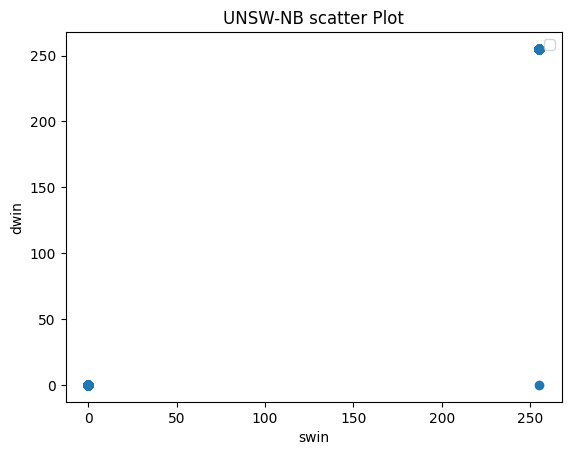

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# convert the Spark DataFrame columns to numpy arrays
swin = data.select('swin').rdd.flatMap(lambda x: x).collect()
dwin = data.select('dwin').rdd.flatMap(lambda x: x).collect()

# scatter the swin against the dwin
ax.scatter(swin, dwin)
# set a title and labels
ax.set_title('UNSW-NB scatter Plot')
ax.set_xlabel('swin')
ax.set_ylabel('dwin')
ax.legend()
plt.show()


In [ ]:

#Line chart on some columns


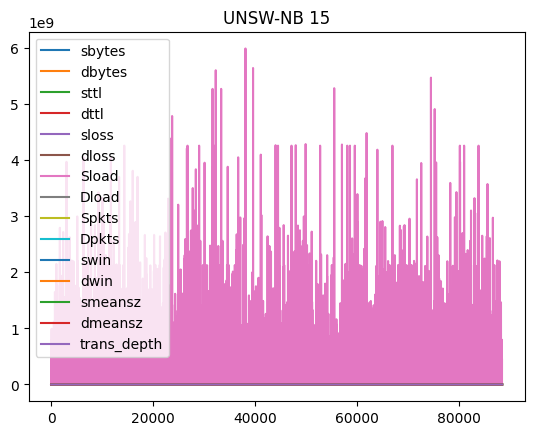

In [114]:
columns = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth']

# create x data
x_data = range(0, data.count())

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, data.select(column).toPandas(), label=column)

# set title and legend
ax.set_title('UNSW-NB 15')
ax.legend()


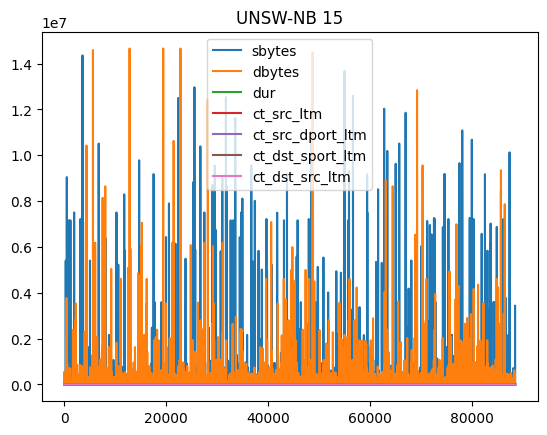

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# convert PySpark DataFrame to Pandas DataFrame
pdf = data.toPandas()

# define columns to plot
columns = ['sbytes', 'dbytes', 'dur', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

# create x data
x_data = range(0, len(pdf))

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, pdf[column], label=column)

# set title and legend
ax.set_title('UNSW-NB 15')
ax.legend()


Text(0, 0.5, 'Frequency')

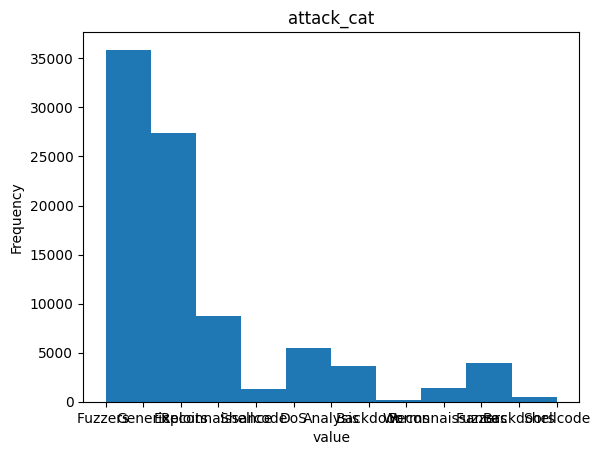

In [119]:
import matplotlib.pyplot as plt

# convert PySpark DataFrame column to Pandas DataFrame
attack_cat_pd = data.select('attack_cat').toPandas()

# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(attack_cat_pd['attack_cat'])

# set title and labels
ax.set_title('attack_cat')
ax.set_xlabel('value')
ax.set_ylabel('Frequency')


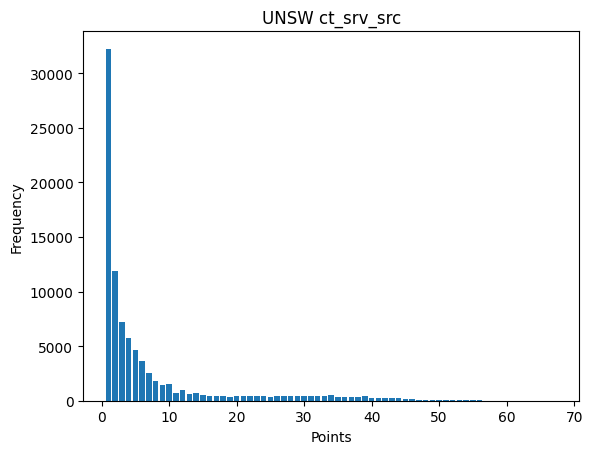

In [122]:
# create a figure and axis
fig, ax = plt.subplots()

# count the occurrence of each value and sort by count
value_counts = data.groupBy(column).count().orderBy('count', ascending=False).collect()

# get x and y data
points = [x[column] for x in value_counts]
frequency = [x['count'] for x in value_counts]

# create bar chart
ax.bar(points, frequency)

# set title and labels
ax.set_title('UNSW ' + column)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()


In [ ]:



# Now that the data is all set, let's split it into training and test. I'll be using 80% of it.





In [60]:
(trainingData, testData) = sdf1.randomSplit([0.8, 0.2],seed = 11)

In [61]:
trainingData.show(5)

+------+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
|dsport|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|            features|
+------+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+----+----+-------+-------+------+-----

In [62]:
testData.show()

+------+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+---------+----+---------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
|dsport|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|Djit|  Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|            features|
+------+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+---------+----+---------

In [ ]:

#Counting toatal no of rows in training and testing data

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

In [ ]:
trainingData.columns

In [67]:
#Arranging all the columns 
#Arranging all the columns with craeting a new dataframe of teaining and test data


data1 = trainingData.select('xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')
data2 = testData.select('xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')

In [ ]:



###### ------ Binary Classification ------ ######

##### ------- Linear SVM ------- #######



In [68]:
#Linear SVC

from pyspark.ml.classification import LinearSVC

svm = LinearSVC(labelCol="Label", featuresCol="features")

#fitting training data data1
svm_model = svm.fit(data1)

#Transforming test data data2 by fitted model 
svm_prediction = svm_model.transform(data2)

#showing predicted model
svm_prediction.select("prediction", "Label", "features").show()


#Evaluating predicted model using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")


#Accuracy of our model
svm_accuracy = evaluator.evaluate(svm_prediction)
print("Accuracy of Support Vector Machine is = %g"% (svm_accuracy))
print("Test Error of Support Vector Machine = %g " % (1.0 - svm_accuracy))


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,19,24...|
|       0.0|    0|(31,[0,9,13,17,19...|
|       0.0|    0|(31,[0,9,13,17,19...|
|       0.0|    0|(31,[0,9,13,17,19...|
|       0.0|    0|(31,[0,9,13,17,19...|
|       0.0|    0|(31,[0,9,13,17,19...|
+----------+-----+--------------------+
only showing top 20 rows

Accuracy of Su

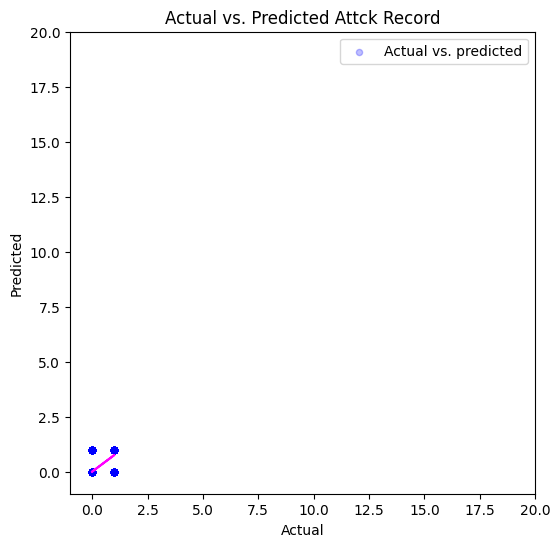

In [70]:
#Plotting Actual and predicted output of Label column

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Converting dataframe into pandas dataframe
sbdf = svm_prediction.select('prediction','Label').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='Label', color='blue', alpha = 0.25, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['Label'], deg=1)
ax.set_title('Actual vs. Predicted Attck Record')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.legend()
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='magenta')
plt.axis([-1, 20, -1, 20])
plt.show(ax)

In [71]:
#Confusion matrix 


tp = float(svm_prediction.filter("prediction == 1.0 AND Label == 1").count())
fp = float(svm_prediction.filter("prediction == 1.0 AND Label == 0").count())
tn = float(svm_prediction.filter("prediction == 0.0 AND Label == 0").count())
fn = float(svm_prediction.filter("prediction == 0.0 AND Label == 1").count())
pr = tp / (tp + fp)
re = tp / (tp + fn)


print( tp, "     ", fp)
print( fn, "     ", tn)
print('\n')
metrics = sparkSession.createDataFrame([
 ("TP", tp),
 ("FP", fp),
 ("TN", tn),
 ("FN", fn),
 ("Precision", pr),
 ("Recall", re),
 ("F1", 2*pr*re/(re+pr))],["metric", "value"])
metrics.show()

15532.0       4933.0
2127.0       383405.0


+---------+------------------+
|   metric|             value|
+---------+------------------+
|       TP|           15532.0|
|       FP|            4933.0|
|       TN|          383405.0|
|       FN|            2127.0|
|Precision|0.7589543122404104|
|   Recall|0.8795515034826434|
|       F1|0.8148148148148149|
+---------+------------------+



In [ ]:



##### ------   Multi Class Classification   ------ ######

##### ------   Decision Tree Classifier  ------- ######





In [72]:
#Before applying Decision Tree Classifier on our data set we will do the following work on our data set:

#Vectorizing columns

from pyspark.ml.feature import VectorAssembler
colmss = ['xState','xSer','sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','Label']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = feature.transform(sdf)

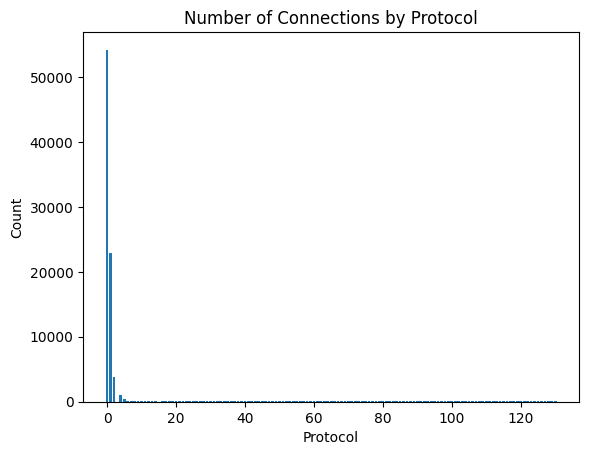

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       2.0|         5.0|(27,[0,2,5,11,15,...|
|       2.0|         0.0|(27,[0,2,5,11,15,...|
|       2.0|         4.0|(27,[0,2,4,5,9,11...|
|       3.0|         3.0|(27,[0,2,4,5,9,11...|
|       3.0|         4.0|(27,[0,2,4,5,9,11...|
+----------+------------+--------------------+
only showing top 5 rows

Test accuracy = 0.643969
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a4733d5c4bbb, depth=5, numNodes=55, numClasses=13, numFeatures=27


In [86]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Drop rows with null values
sdf = sdf.na.drop()
# Load the data
#sdf = sdf
# Count the number of connections by protocol
protocol_counts = sdf.groupBy("xProto").count().sort(col("count").desc()).toPandas()

# Create a bar plot of the protocol counts
import matplotlib.pyplot as plt
plt.bar(protocol_counts["xProto"], protocol_counts["count"])
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.title("Number of Connections by Protocol")
plt.show()

# Vectorize the data
#features = ['sbytes', 'dbytes', 'dur', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
#assembler = VectorAssembler(inputCols=features, outputCol="features")
vectorized_sdf = sdf

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
label_indexer = StringIndexer(inputCol="attack_cat", outputCol="indexedLabel").fit(vectorized_sdf)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 15 distinct values are treated as continuous.
feature_indexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=15).fit(vectorized_sdf)

# Split the data into training and test sets (70% for training and 30% for testing)
(trainingData, testData) = vectorized_sdf.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
decision_tree = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[label_indexer, feature_indexer, decision_tree])

# Train model. This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions on test data
predictions = model.transform(testData)

# Select example rows to display
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test accuracy = %g" % accuracy)

# Print the decision tree model
treeModel = model.stages[2]
print(treeModel)


In [87]:
tree = model.stages[-1]

display(tree) #visualize the decision tree model
print(tree.toDebugString) #print the nodes of the decision tree model


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a4733d5c4bbb, depth=5, numNodes=55, numClasses=13, numFeatures=27

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a4733d5c4bbb, depth=5, numNodes=55, numClasses=13, numFeatures=27
  If (feature 1 in {1.0,3.0})
   If (feature 2 <= 119.0)
    If (feature 6 in {1.0,2.0})
     If (feature 22 <= 0.00650000015)
      If (feature 2 <= 108.0)
       Predict: 0.0
      Else (feature 2 > 108.0)
       Predict: 4.0
     Else (feature 22 > 0.00650000015)
      If (feature 9 <= 40027.403999999995)
       Predict: 0.0
      Else (feature 9 > 40027.403999999995)
       Predict: 4.0
    Else (feature 6 not in {1.0,2.0})
     If (feature 15 <= 57.5)
      If (feature 5 in {1.0})
       Predict: 4.0
      Else (feature 5 not in {1.0})
       Predict: 1.0
     Else (feature 15 > 57.5)
      If (feature 2 <= 117.0)
       Predict: 3.0
      Else (feature 2 > 117.0)
       Predict: 1.0
   Else (feature 2 > 119.0)
    If (feature 5 in {3.0})
     If (feature 4 <= 1.7653975499999999)
      If (feature 9 <= 5.7833332E7)
       Predict: 4.0
      Else (feature 9 

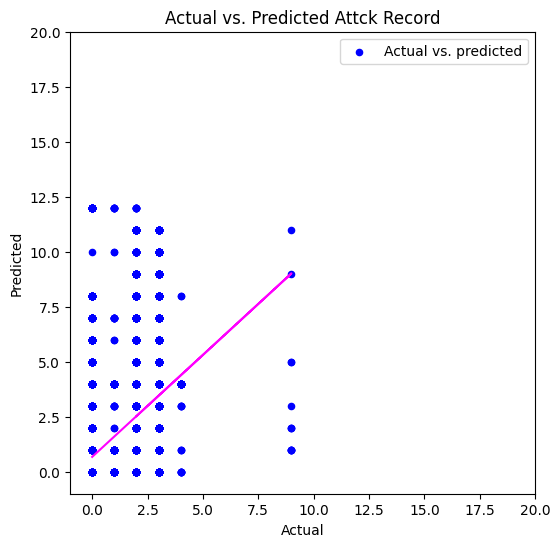

In [88]:
#Plot Between Actual and Predicted attck_cat
%matplotlib inline
import numpy as np

sbdf = predictions.select('prediction','indexedLabel').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='indexedLabel', color='blue', alpha = 1, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['indexedLabel'], deg=1)
ax.set_title('Actual vs. Predicted Attck Record')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='magenta')
plt.axis([-1, 20, -1, 20])
plt.show(ax)

In [ ]:





###### ********* ---------  END  --------- ********* ########




